# Comparing Offline and Sequential K-Means Algorithms

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
from sklearn.cluster import KMeans

full = pd.read_csv('athlete_events.csv')

In [2]:
# Remove entries with null values in Age, Height, or Weight
full = full[full['Height'].notna()]
full = full[full['Weight'].notna()]
full = full[full['Age'].notna()]

In [3]:
#Creates a list of 7 dataframes based on the list of years
dataframes = []
years = [[1896, 1900, 1904, 1906, 1908],
         [1912, 1920, 1924, 1928, 1932],
         [1936, 1948, 1952, 1956, 1960],
         [1964, 1968, 1972, 1976, 1980],
         [1984, 1988, 1992, 1994, 1996],
         [1998, 2000, 2002, 2004, 2006],
         [2008, 2010, 2012, 2014, 2016]]
for x in years:
    pd = full[full['Year'] == x[0]][['Weight', 'Height', 'Sport', 'Sex']]
    for i in range(1,5):
        weight_heightx = full[full['Year'] == (x[i])][['Weight', 'Height', 'Sport', 'Sex']]
        pd = pd.append(weight_heightx)
    dataframes.append(pd)

In [4]:
for j in range(len(dataframes)):
    print(years[j])
    print(dataframes[j].head())

[1896, 1900, 1904, 1906, 1908]
       Weight  Height      Sport Sex
32333    66.0   183.0  Athletics   M
32334    66.0   183.0  Athletics   M
44062    72.0   175.0  Athletics   M
44063    72.0   175.0  Athletics   M
44064    72.0   175.0  Athletics   M
[1912, 1920, 1924, 1928, 1932]
      Weight  Height      Sport Sex
727     78.0   181.0  Athletics   M
728     78.0   181.0  Athletics   M
875     84.0   186.0  Athletics   M
1450    78.0   188.0  Athletics   M
1451    78.0   188.0  Athletics   M
[1936, 1948, 1952, 1956, 1960]
      Weight  Height        Sport Sex
94      70.0   174.0    Athletics   M
125     93.0   194.0     Shooting   M
625     75.0   177.0    Athletics   M
1327    56.0   156.0  Ski Jumping   M
1328    60.0   179.0    Athletics   M
[1964, 1968, 1972, 1976, 1980]
     Weight  Height           Sport Sex
192    97.0   188.0       Wrestling   M
234    67.0   169.0   Weightlifting   M
265    64.0   175.0  Figure Skating   M
312    57.0   168.0       Athletics   M
508   117.

In [5]:
#Creates a list of 7 dataframes based on the cumulative list of years
total = []

total_years = [1896, 1900, 1904, 1906, 1908,
               1912, 1920, 1924, 1928, 1932,
               1936, 1948, 1952, 1956, 1960,
               1964, 1968, 1972, 1976, 1980,
               1984, 1988, 1992, 1994, 1996,
               1998, 2000, 2002, 2004, 2006,
               2008, 2010, 2012, 2014, 2016]
counter = 0
df = full[full['Year'] == (1800)][['Weight', 'Height', 'Sport', 'Sex']]
for x in total_years:
    df = df.append(full[full['Year'] == (x)][['Weight', 'Height', 'Sport', 'Sex']])
    counter += 1
    if counter % 5 == 0:
        total.append(df)

In [6]:
for j in range(len(total)):
    print('Added %s to Total' % years[j])
    print(total[j].head())

Added [1896, 1900, 1904, 1906, 1908] to Total
       Weight  Height      Sport Sex
32333    66.0   183.0  Athletics   M
32334    66.0   183.0  Athletics   M
44062    72.0   175.0  Athletics   M
44063    72.0   175.0  Athletics   M
44064    72.0   175.0  Athletics   M
Added [1912, 1920, 1924, 1928, 1932] to Total
       Weight  Height      Sport Sex
32333    66.0   183.0  Athletics   M
32334    66.0   183.0  Athletics   M
44062    72.0   175.0  Athletics   M
44063    72.0   175.0  Athletics   M
44064    72.0   175.0  Athletics   M
Added [1936, 1948, 1952, 1956, 1960] to Total
       Weight  Height      Sport Sex
32333    66.0   183.0  Athletics   M
32334    66.0   183.0  Athletics   M
44062    72.0   175.0  Athletics   M
44063    72.0   175.0  Athletics   M
44064    72.0   175.0  Athletics   M
Added [1964, 1968, 1972, 1976, 1980] to Total
       Weight  Height      Sport Sex
32333    66.0   183.0  Athletics   M
32334    66.0   183.0  Athletics   M
44062    72.0   175.0  Athletics   M
44

In [7]:
#Creates a list of 35 dataframes based on the cumulative list of years
cumulative_years = []

df = full[full['Year'] == (1800)][['Weight', 'Height', 'Sport', 'Sex']]
for x in total_years:
    df = df.append(full[full['Year'] == (x)][['Weight', 'Height', 'Sport', 'Sex']])
    cumulative_years.append(df)

### sorting two 2d arrays

In [8]:
def sortingMax(array1, array2):
    sorted1 = []
    sorted2 = []
    for i in range(len(array1)):
        if array1[i][0] > array2[i][0]:
            sorted1 = np.append(sorted1, array1[i], axis=0)
        else:
            sorted1 = np.append(sorted1, array2[i], axis=0)
    sorted1 = np.reshape(sorted1, (len(array1), len(array1[0])))
    return sorted1

In [9]:
def sortingMin(array1, array2):
    sorted1 = []
    sorted2 = []
    for i in range(len(array1)):
        if array1[i][0] < array2[i][0]:
            sorted1 = np.append(sorted1, array1[i], axis=0)
        else:
            sorted1 = np.append(sorted1, array2[i], axis=0)
    sorted1 = np.reshape(sorted1, (len(array1), len(array1[0])))
    return sorted1

## Offline K-Means Algorithm

In [10]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], marker='D', s=50, color='blue'); #add color='blue' removed c=muColorVec
    
def calcSqDistances(X, Kmus):

    N, K = np.shape(X)[0], np.shape(Kmus)[0]
    sqDmat = np.zeros((N, K))
    D = np.shape(X)[1]
    
    for n in range(N):
        for k in range(K):
            sum = 0
            for d in range(D):
                sum = sum + (X[n, d] - Kmus[k, d])**2
            sqDmat[n, k] = (sum)**0.5
    
    return sqDmat

def determineRnk(sqDmat):

    N, K = np.shape(sqDmat)[0], np.shape(sqDmat)[1]
    Rnk = np.zeros((N, K))
    
    for i in range(N):
        min = np.amin(sqDmat[i])
        for j in range(K):
            if sqDmat[i, j] == min:
                Rnk[i, j] = 1
            
    return Rnk


def recalcMus(X, Rnk):
    
    N, K, D = np.shape(X)[0], np.shape(Rnk)[1], np.shape(X)[1]
    Kmus = np.zeros((K, D))
        
    for k in range(K):
        for d in range(D):
            sum = 0
            count = 0
            for n in range(N):
                if Rnk[n, k] == 1:
                    count = count + 1
                    sum = sum + X[n, d]
            
            Kmus[k, d] = sum / count
                        
    return Kmus

def runKMeans(K, array):
    if array.size == 0:
        print('No Data')
        return #
    X = array
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus

        Kmus = recalcMus(X, Rnk)
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            plotCurrent(X,Rnk,Kmus)
            break
            
def returnOfflineCenters(K, array):
    if array.size == 0:
        print('No Data')
        return #
    X = array
    N = np.shape(X)[0]
    D = np.shape(X)[1]
    Kmus = np.zeros((K, D))
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    maxiters = 1000;
    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus);
        Rnk = determineRnk(sqDmat)
        KmusOld = Kmus

        Kmus = recalcMus(X, Rnk)
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            # print('Final Cluster centers =')
            return Kmus

## Sequential K-Means Algorithm

In [11]:
def runSequentialKMeans(weight, frequency, array):
    K = 2
    X = array
    N, D = np.shape(X)
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    Rnk = np.zeros((1, K))
    counter = 1
    
    firstClusterArray = []
    secondClusterArray = []

    # within this loop, it takes a datapoint and compares it to the K cluster centers
    # creates a 1xK matrix where 1 represents the closest cluster and 0 otherwise
    for i in array:
        Rnk = np.zeros((1, K))
        printedX = X[:counter, :]
        min = 0
        
        for j in range(K):
            Rnk[:, j] = math.dist(i, Kmus[j])
            min = np.amin(Rnk)
        
        # changes Rnk from values of distances to 1s and 0s representing closest cluster and otherwise
        for j in range(K):
            if Rnk[:, j] == min:
                Rnk[:, j] = 1
            else:
                Rnk[:, j] = 0
            
        # let's say have the 'weight' parameter be between 0 and 1
        if (((weight > 0) and (weight <= 1)) == False):
            print("Weight parameter must be greater than 0 and less than or equal to 1")
            break
        
        # moving the Kmus datapoint closer to the new datapoint
        for j in range(K):
            if Rnk[:, j] == 1:
                deltaX = i[0] - Kmus[j][0]
                deltaY = i[1] - Kmus[j][1]
                deltaXWeight = deltaX * weight
                deltaYWeight = deltaY * weight
                Kmus[j][0] += deltaXWeight
                Kmus[j][1] += deltaYWeight        
        
        # add points to their corresponding arrays so they can be color coded
        if Rnk[0, 0] == 1:
            firstClusterArray.append(i)
        if Rnk[0, 1] == 1:
            secondClusterArray.append(i)
            
        counter += 1
        
        if (frequency == 0):
            break
        elif (counter % frequency == 0):
            plt.scatter(Kmus[:, 0], Kmus[:, 1], marker ='D')
            if ((firstClusterArray != []) and (secondClusterArray != [])):
                firstCluster = np.array(firstClusterArray)
                secondCluster = np.array(secondClusterArray)
                plt.scatter(firstCluster[:, 0], firstCluster[:, 1], marker='o', color='red',facecolors='none' , alpha=0.3)
                plt.scatter(secondCluster[:, 0], secondCluster[:, 1], marker='o', color='green',facecolors='none', alpha=0.3)
            plt.show()
    
    if (frequency == 0):
        # print('Final Cluster centers =')
        return Kmus
    
    # plt.scatter(Kmus[:, 0], Kmus[:, 1], marker = 'D')
    if ((firstClusterArray != []) and (secondClusterArray != [])):
        firstCluster = np.array(firstClusterArray)
        secondCluster = np.array(secondClusterArray)
        plt.scatter(firstCluster[:, 0], firstCluster[:, 1], marker='o', color='red',facecolors='none', alpha=0.3)
        plt.scatter(secondCluster[:, 0], secondCluster[:, 1], marker='o', color='green',facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:, 0], Kmus[:, 1], marker = 'D', color='blue')
    plt.show()
    
    # print('Final Cluster centers =')
    return Kmus

## Comparing the two algorithms

### Comparing swimmers from the years 1936, 1948, 1952, 1956, 1960

array([[ 78.61477573, 181.89973615],
       [ 61.71361502, 167.75117371]])

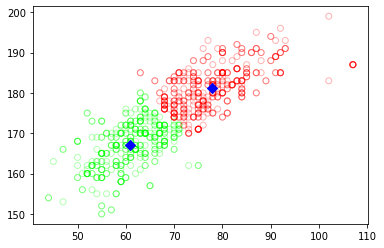

In [12]:
runKMeans(2, dataframes[2][dataframes[2]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())
returnOfflineCenters(2, dataframes[2][dataframes[2]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())

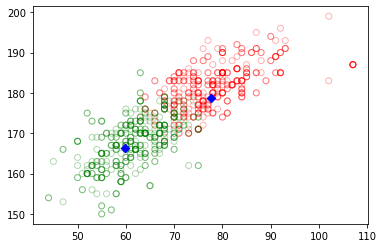

array([[ 77.64044827, 178.7599913 ],
       [ 59.72965596, 166.25325421]])

In [13]:
runSequentialKMeans(0.2, 10000, dataframes[2][dataframes[2]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())

<AxesSubplot:xlabel='Weight', ylabel='Height'>

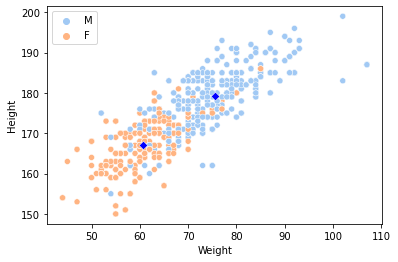

In [14]:
sns.scatterplot(data=dataframes[2][dataframes[2]['Sport'] == 'Swimming'], x='Weight', y='Height', hue='Sex', palette='pastel')
sns.scatterplot(data=dataframes[2][dataframes[2]['Sport'] == 'Swimming'].groupby('Sex').mean(), x='Weight', y='Height', marker='D', color='blue')

In [15]:
dataframes[2][dataframes[2]['Sport'] == 'Swimming'].groupby('Sex').mean().to_numpy()

array([[ 60.70253165, 167.02531646],
       [ 75.46625767, 179.18609407]])

### Comparing swimmers from the years 1964, 1968, 1972, 1976, 1980

array([[ 75.9362461 , 182.83325903],
       [ 59.30103093, 167.92247423]])

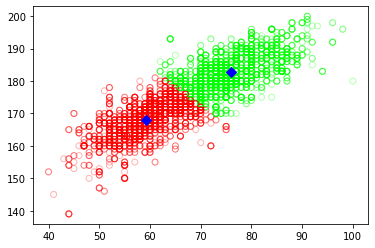

In [16]:
runKMeans(2, dataframes[3][dataframes[3]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())
returnOfflineCenters(2, dataframes[3][dataframes[3]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())

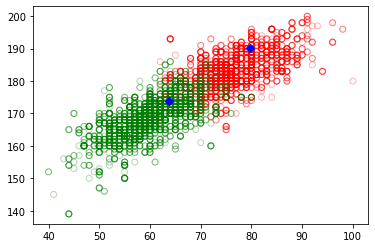

array([[ 79.65875191, 190.23713897],
       [ 63.70854761, 173.75428042]])

In [17]:
runSequentialKMeans(0.2, 10000, dataframes[3][dataframes[3]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())

<AxesSubplot:xlabel='Weight', ylabel='Height'>

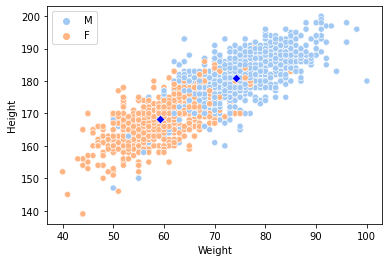

In [18]:
sns.scatterplot(data=dataframes[3][dataframes[3]['Sport'] == 'Swimming'], x='Weight', y='Height', hue='Sex', palette='pastel')
sns.scatterplot(data=dataframes[3][dataframes[3]['Sport'] == 'Swimming'].groupby('Sex').mean(), x='Weight', y='Height', marker='D', color='blue')

In [19]:
dataframes[3][dataframes[3]['Sport'] == 'Swimming'].groupby('Sex').mean()

,Weight,Height
Sex,,
F,59.241830,168.219888
M,74.122724,180.910530


### Comparing swimmers from the all Olympic Games

array([[ 61.53938982, 170.91871278],
       [ 80.01634981, 186.59250407]])

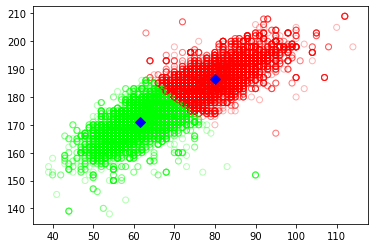

In [20]:
runKMeans(2, total[6][total[6]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())
returnOfflineCenters(2, total[6][total[6]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())

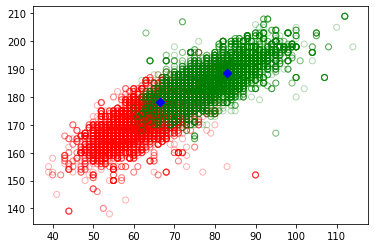

array([[ 66.42562945, 178.35329723],
       [ 83.02742157, 188.72128228]])

In [21]:
runSequentialKMeans(0.2, 10000000, total[6][total[6]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())

<AxesSubplot:xlabel='Weight', ylabel='Height'>

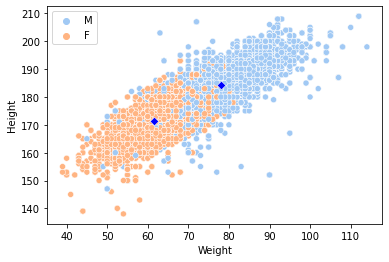

In [22]:
sns.scatterplot(data=total[6][total[6]['Sport'] == 'Swimming'], x='Weight', y='Height', hue='Sex', palette='pastel')
sns.scatterplot(data=total[6][total[6]['Sport'] == 'Swimming'].groupby('Sex').mean(), x='Weight', y='Height', marker='D', color='blue')

### Graphing Cluster Centers for each interval

#### Movement of Cluster Centers for independent intervals

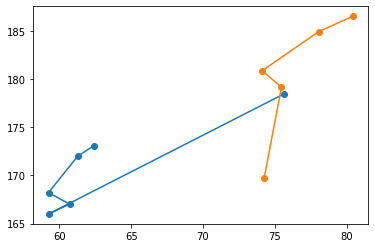

In [23]:
a = dataframes[0][dataframes[0]['Sport'] == 'Swimming'].groupby('Sex').mean().to_numpy()[0]
b = []

for i in range(1, 6):
    a = np.append(a, dataframes[i][dataframes[i]['Sport'] == 'Swimming'].groupby('Sex').mean().to_numpy()[0], axis=0)
    b = np.append(b, dataframes[i][dataframes[i]['Sport'] == 'Swimming'].groupby('Sex').mean().to_numpy()[1], axis=0)
    
a = np.reshape(a, (6, 2))
b = np.reshape(b, (5, 2))

# print('%s \n\n %s' % (a, b))

plt.plot(a[:, 0], a[:, 1], marker='o')
plt.plot(b[:, 0], b[:, 1], marker='o')

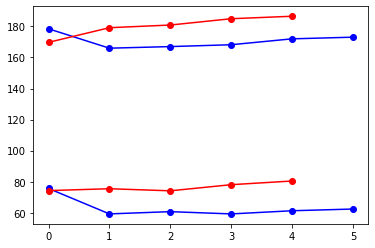

In [24]:
plt.plot(a[:, 0], marker='o', color='blue')
plt.plot(a[:, 1], marker='o', color='blue')
plt.plot(b[:, 0], marker='o', color='red')
plt.plot(b[:, 1], marker='o', color='red')

#### Movement of Cluster Centers for cumulative intervals

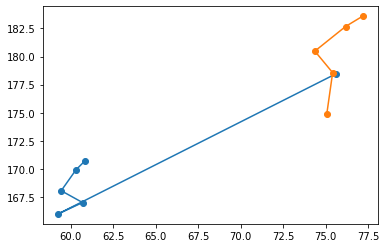

In [25]:
c = total[0][total[0]['Sport'] == 'Swimming'].groupby('Sex').mean().to_numpy()[0]
d = []

for i in range(1, 6):
    c = np.append(c, total[i][total[i]['Sport'] == 'Swimming'].groupby('Sex').mean().to_numpy()[0], axis=0)
    d = np.append(d, total[i][total[i]['Sport'] == 'Swimming'].groupby('Sex').mean().to_numpy()[1], axis=0)

c = np.reshape(c, (6, 2))
d = np.reshape(d, (5, 2))

# print('%s \n\n %s' % (c, d))

plt.plot(c[:, 0], c[:, 1], marker='o')
plt.plot(d[:, 0], d[:, 1], marker='o')

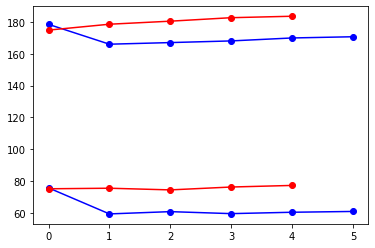

In [26]:
plt.plot(c[:, 0], marker='o', color='blue')
plt.plot(c[:, 1], marker='o', color='blue')
plt.plot(d[:, 0], marker='o', color='red')
plt.plot(d[:, 1], marker='o', color='red')

#### Movement of Cluster Centers for Offline K-Means

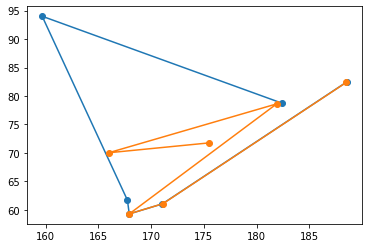

In [27]:
offlineA = returnOfflineCenters(2, dataframes[0][dataframes[0]['Sport'] == 'Swimming'][['Height', 'Weight']].to_numpy())[0]
offlineB = returnOfflineCenters(2, dataframes[0][dataframes[0]['Sport'] == 'Swimming'][['Height', 'Weight']].to_numpy())[1]

for i in range(1, 6):
    offlineA = np.append(offlineA,
                         returnOfflineCenters(2, dataframes[i][dataframes[i]['Sport'] == 'Swimming'][['Height', 'Weight']].to_numpy())[0],
                         axis=0)
    offlineB = np.append(offlineB,
                         returnOfflineCenters(2, dataframes[i][dataframes[i]['Sport'] == 'Swimming'][['Height', 'Weight']].to_numpy())[1],
                         axis=0)

offlineA = np.reshape(offlineA, (6,2))
offlineB = np.reshape(offlineB, (6,2))

# print('%s \n\n %s' % (offlineA, offlineB))

plt.plot(offlineA[:, 0], offlineA[:, 1], marker='o')
plt.plot(offlineB[:, 0], offlineB[:, 1], marker='o')

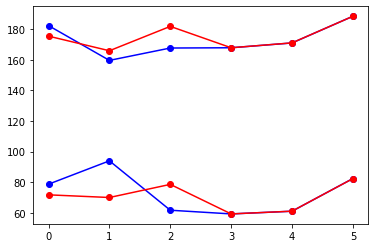

In [28]:
plt.plot(offlineA[:, 0], marker='o', color='blue')
plt.plot(offlineA[:, 1], marker='o', color='blue')
plt.plot(offlineB[:, 0], marker='o', color='red')
plt.plot(offlineB[:, 1], marker='o', color='red')

#### Movement of Cluster Centers for Sequential K-Means

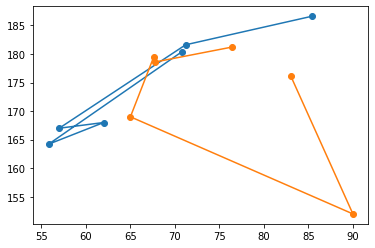

In [29]:
onlineA = runSequentialKMeans(0.2, 0, dataframes[0][dataframes[0]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())[0]
onlineB = runSequentialKMeans(0.2, 0, dataframes[0][dataframes[0]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())[1]

for i in range(1, 6):
    onlineA = np.append(onlineA,
                        runSequentialKMeans(0.2, 0, dataframes[i][dataframes[i]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())[0],
                        axis=0)
    onlineB = np.append(onlineB,
                        runSequentialKMeans(0.2, 0, dataframes[i][dataframes[i]['Sport'] == 'Swimming'][['Weight', 'Height']].to_numpy())[1],
                        axis=0)
    
onlineA = np.reshape(onlineA, (6,2))
onlineB = np.reshape(onlineB, (6,2))

# print('%s \n\n %s' % (onlineA, onlineB))

plt.plot(onlineA[:, 0], onlineA[:, 1], marker='o')
plt.plot(onlineB[:, 0], onlineB[:, 1], marker='o')

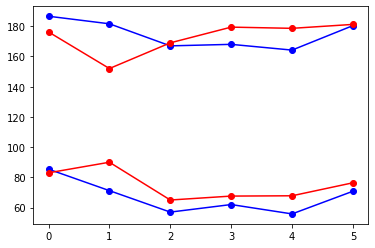

In [30]:
plt.plot(onlineA[:, 0], marker='o', color='blue')
plt.plot(onlineA[:, 1], marker='o', color='blue')
plt.plot(onlineB[:, 0], marker='o', color='red')
plt.plot(onlineB[:, 1], marker='o', color='red')

#### Error for Offline Clustering

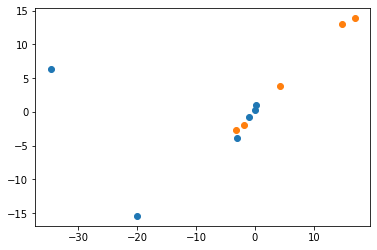

In [31]:
offlineA[:, [1, 0]] = offlineA[:, [0, 1]]
offlineB[:, [1, 0]] = offlineB[:, [0, 1]]

errorOfflineA = a - offlineA
errorOfflineB = b - offlineB[1:6]

# print('%s \n\n %s' % (errorOfflineA, errorOfflineB))

plt.scatter(errorOfflineA[:, 0], errorOfflineA[:, 1], marker='o')
plt.scatter(errorOfflineB[:, 0], errorOfflineB[:, 1], marker='o')

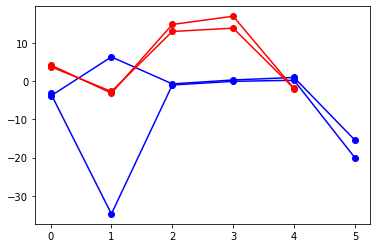

In [32]:
plt.plot(errorOfflineA[:, 0], marker='o', color='blue')
plt.plot(errorOfflineA[:, 1], marker='o', color='blue')
plt.plot(errorOfflineB[:, 0], marker='o', color='red')
plt.plot(errorOfflineB[:, 1], marker='o', color='red')

#### Error for Sequential Clustering

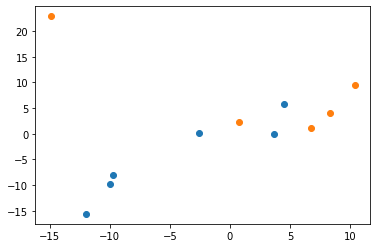

In [33]:
errorOnlineA = c - onlineA
errorOnlineB = d - onlineB[1:6]

# print('%s \n\n %s' % (errorOnlineA, errorOnlineB))

plt.scatter(errorOnlineA[:, 0], errorOnlineA[:, 1], marker='o')
plt.scatter(errorOnlineB[:, 0], errorOnlineB[:, 1], marker='o')

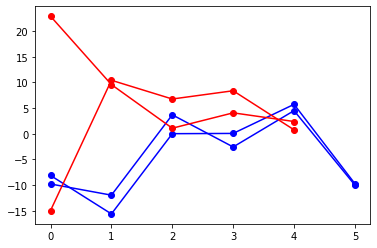

In [34]:
plt.plot(errorOnlineA[:, 0], marker='o', color='blue')
plt.plot(errorOnlineA[:, 1], marker='o', color='blue')
plt.plot(errorOnlineB[:, 0], marker='o', color='red')
plt.plot(errorOnlineB[:, 1], marker='o', color='red')

#### offline kmeans with yearly data

In [35]:
# yearlyA = returnOfflineCenters(2, cumulative_years[0][['Height', 'Weight']].to_numpy())[0]
# yearlyB = returnOfflineCenters(2, cumulative_years[0][['Height', 'Weight']].to_numpy())[1]

yearlyA = KMeans(n_clusters=2, random_state=0).fit(cumulative_years[0][['Height', 'Weight']].to_numpy()).cluster_centers_[0]
yearlyB = KMeans(n_clusters=2, random_state=0).fit(cumulative_years[0][['Height', 'Weight']].to_numpy()).cluster_centers_[1]

for i in range(1, 35):
    yearlyA = np.append(yearlyA,
                        KMeans(n_clusters=2, random_state=0).fit(cumulative_years[i][['Height', 'Weight']].to_numpy()).cluster_centers_[0],
                        axis=0)
    yearlyB = np.append(yearlyB,
                        KMeans(n_clusters=2, random_state=0).fit(cumulative_years[i][['Height', 'Weight']].to_numpy()).cluster_centers_[1],
                        axis=0)

In [36]:
yearlyA = np.reshape(yearlyA, (35, 2))
yearlyB = np.reshape(yearlyB, (35, 2))

In [37]:
# plt.plot(yearlyA[:, 0], yearlyA[:, 1], marker='o')
# plt.plot(yearlyB[:, 0], yearlyB[:, 1], marker='o')

In [38]:
# plt.plot(yearlyA[:, 0], marker='o', color='blue') #height
# plt.plot(yearlyA[:, 1], marker='o', color='green') #weight
# plt.plot(yearlyB[:, 0], marker='o', color='red') #height
# plt.plot(yearlyB[:, 1], marker='o', color='orange') #weight

In [39]:
maleoffline = sortingMax(yearlyA, yearlyB)
femaleoffline = sortingMin(yearlyA, yearlyB)

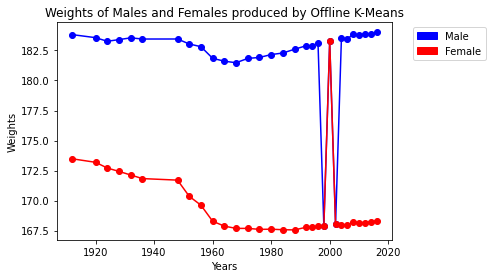

In [40]:
# plt.plot(maleoffline, marker='o')
# plt.plot(femaleoffline, marker='o')

plt.plot(total_years[5:35], maleoffline[:, 0][5:35], marker='o', color='blue')
plt.plot(total_years[5:35], femaleoffline[:, 0][5:35], marker='o', color='red')
plt.xlabel('Years')
plt.ylabel('Weights')
plt.title('Weights of Males and Females produced by Offline K-Means')

blue_patch = mpatches.Patch(color='blue', label='Male')
red_patch = mpatches.Patch(color='red', label='Female')
plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

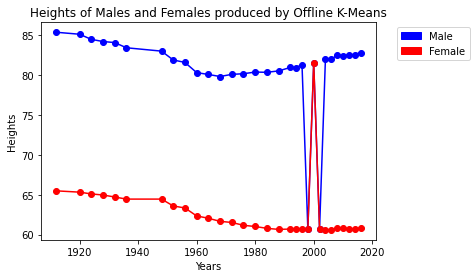

In [41]:
plt.plot(total_years[5:35], maleoffline[:, 1][5:35], marker='o', color='blue')
plt.plot(total_years[5:35], femaleoffline[:, 1][5:35], marker='o', color='red')
plt.xlabel('Years')
plt.ylabel('Heights')
plt.title('Heights of Males and Females produced by Offline K-Means')

blue_patch = mpatches.Patch(color='blue', label='Male')
red_patch = mpatches.Patch(color='red', label='Female')
plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

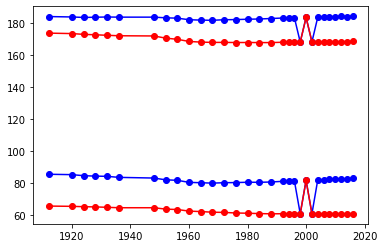

In [42]:
plt.plot(total_years[5:35], maleoffline[:, 0][5:35], marker='o', color='blue')
plt.plot(total_years[5:35], femaleoffline[:, 0][5:35], marker='o', color='red')
plt.plot(total_years[5:35], maleoffline[:, 1][5:35], marker='o', color='blue')
plt.plot(total_years[5:35], femaleoffline[:, 1][5:35], marker='o', color='red')

#### cumulative years actual data

In [43]:
e = cumulative_years[6].groupby('Sex').mean().to_numpy()[0]
f = cumulative_years[6].groupby('Sex').mean().to_numpy()[1]

for i in range(6, 35):
    e = np.append(e, cumulative_years[i].groupby('Sex').mean().to_numpy()[0], axis=0)
    f = np.append(f, cumulative_years[i].groupby('Sex').mean().to_numpy()[1], axis=0)

In [44]:
e = np.reshape(e, (30,2))
f = np.reshape(f, (30,2))

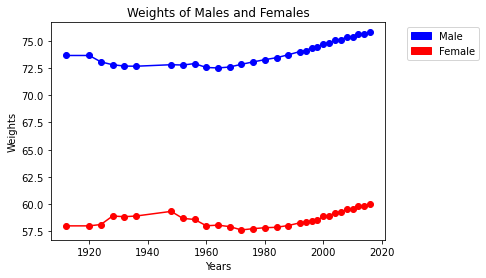

In [45]:
plt.plot(total_years[5:35], e[:, 0], marker='o', color='red') #female
plt.plot(total_years[5:35], f[:, 0], marker='o', color='blue') #male
plt.xlabel('Years')
plt.ylabel('Weights')
plt.title('Weights of Males and Females')

blue_patch = mpatches.Patch(color='blue', label='Male')
red_patch = mpatches.Patch(color='red', label='Female')
plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

# weights (actual data)

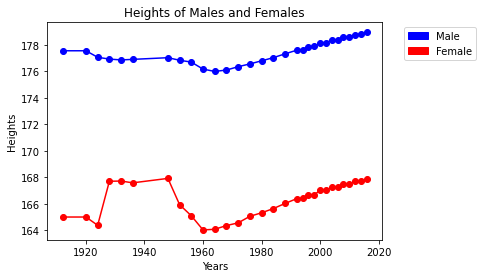

In [46]:
plt.plot(total_years[5:35], e[:, 1], marker='o', color='red') #female
plt.plot(total_years[5:35], f[:, 1], marker='o', color='blue') #male
plt.xlabel('Years')
plt.ylabel('Heights')
plt.title('Heights of Males and Females')

blue_patch = mpatches.Patch(color='blue', label='Male')
red_patch = mpatches.Patch(color='red', label='Female')
plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

#heights (actual data)

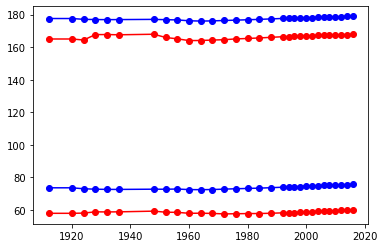

In [47]:
plt.plot(total_years[5:35], e[:, 0], marker='o', color='red') #female
plt.plot(total_years[5:35], f[:, 0], marker='o', color='blue') #male
plt.plot(total_years[5:35], e[:, 1], marker='o', color='red') #female
plt.plot(total_years[5:35], f[:, 1], marker='o', color='blue') #male

#### Compare yearly data with the offline kmeans of yearly data

In [48]:
maleoffline[:, [1, 0]] = maleoffline[:, [0, 1]]
femaleoffline[:, [1, 0]] = femaleoffline[:, [0, 1]]

In [49]:
# yearlyOfflineErrorE = e - yearlyA[5:35] #weights then height
# yearlyOfflineErrorF = f - yearlyB[5:35]
yearlyOfflineErrorE = e - maleoffline[5:35]
yearlyOfflineErrorF = f - femaleoffline[5:35]

In [50]:
# plt.plot(yearlyOfflineErrorE, marker='o')

In [51]:
# plt.plot(yearlyOfflineErrorF, marker='o')

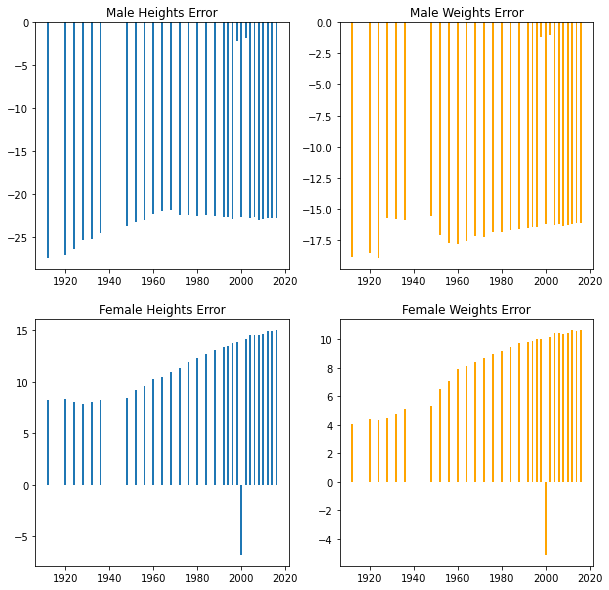

In [52]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.bar(total_years[5:35], yearlyOfflineErrorE[:, 0])
plt.title('Male Heights Error')

plt.subplot(2, 2, 2)
plt.bar(total_years[5:35], yearlyOfflineErrorE[:, 1], color='orange')
plt.title('Male Weights Error')

plt.subplot(2, 2, 3)
plt.bar(total_years[5:35], yearlyOfflineErrorF[:, 0])
plt.title('Female Heights Error')

plt.subplot(2, 2, 4)
plt.bar(total_years[5:35], yearlyOfflineErrorF[:, 1], color='orange')
plt.title('Female Weights Error')

plt.show()

#### online kmeans on yearly data

In [53]:
onlineE = runSequentialKMeans(0.2, 0, cumulative_years[0][['Height', 'Weight']].to_numpy())[0]
onlineF = runSequentialKMeans(0.2, 0, cumulative_years[0][['Height', 'Weight']].to_numpy())[1]

for i in range(1, 35):
    onlineE = np.append(onlineE,
                        runSequentialKMeans(0.2, 0, cumulative_years[i][['Height', 'Weight']].to_numpy())[0],
                        axis=0)
    onlineF = np.append(onlineF,
                        runSequentialKMeans(0.2, 0, cumulative_years[i][['Height', 'Weight']].to_numpy())[1],
                        axis=0)

In [54]:
onlineE = np.reshape(onlineE, (35,2))
onlineF = np.reshape(onlineF, (35,2))

In [55]:
# plt.plot(onlineE, marker='o')
# plt.plot(onlineF, marker='o')

In [56]:
# # male
# plt.plot(onlineE[:, 0], marker='o', color='blue') #height
# plt.plot(onlineE[:, 1], marker='o', color='green') #weight

# # female
# plt.plot(onlineF[:, 0], marker='o', color='red') #height
# plt.plot(onlineF[:, 1], marker='o', color='orange') #weight

In [57]:
# plt.scatter(total_years, onlineE[:, 0], marker='o')
# plt.scatter(total_years, onlineE[:, 1], marker='o')
# plt.scatter(total_years, onlineF[:, 0], marker='o')
# plt.scatter(total_years, onlineF[:, 1], marker='o')

In [58]:
onlinemale = sortingMax(onlineE, onlineF)
onlinefemale = sortingMin(onlineE, onlineF)

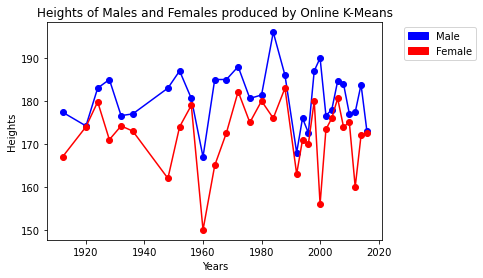

In [59]:
plt.plot(total_years[5:35], onlinemale[:,0][5:35], marker='o', color='blue')
plt.plot(total_years[5:35], onlinefemale[:,0][5:35], marker='o', color='red')
plt.xlabel('Years')
plt.ylabel('Heights')
plt.title('Heights of Males and Females produced by Online K-Means')

blue_patch = mpatches.Patch(color='blue', label='Male')
red_patch = mpatches.Patch(color='red', label='Female')
plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

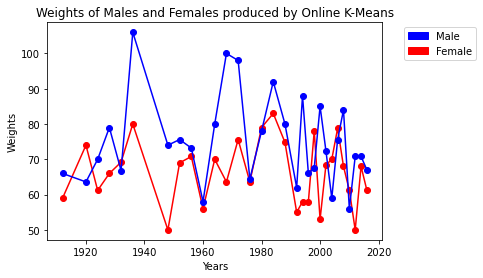

In [60]:
plt.plot(total_years[5:35], onlinefemale[:,1][5:35], marker='o', color='red')
plt.plot(total_years[5:35], onlinemale[:,1][5:35], marker='o', color='blue')
plt.xlabel('Years')
plt.ylabel('Weights')
plt.title('Weights of Males and Females produced by Online K-Means')

blue_patch = mpatches.Patch(color='blue', label='Male')
red_patch = mpatches.Patch(color='red', label='Female')
plt.legend(handles=[blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

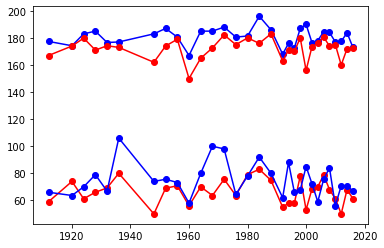

In [61]:
plt.plot(total_years[5:35], onlinemale[:,0][5:35], marker='o', color='blue')
plt.plot(total_years[5:35], onlinefemale[:,0][5:35], marker='o', color='red')
plt.plot(total_years[5:35], onlinefemale[:,1][5:35], marker='o', color='red')
plt.plot(total_years[5:35], onlinemale[:,1][5:35], marker='o', color='blue')

#### error of online kmeans and real data

In [62]:
yearlyA[:, [1,0]] = yearlyA[:,[ 0, 1]]
yearlyB[:, [1,0]] = yearlyB[:,[ 0, 1]]

In [63]:
# yearlyOnlineErrorE = onlineE - yearlyA
# yearlyOnlineErrorF = onlineF - yearlyB
yearlyOnlineErrorE = onlinemale - yearlyA
yearlyOnlineErrorF = onlinefemale - yearlyB

In [64]:
# plt.plot(yearlyOnlineErrorE, marker='o')

In [65]:
# plt.plot(yearlyOnlineErrorF, marker='o')

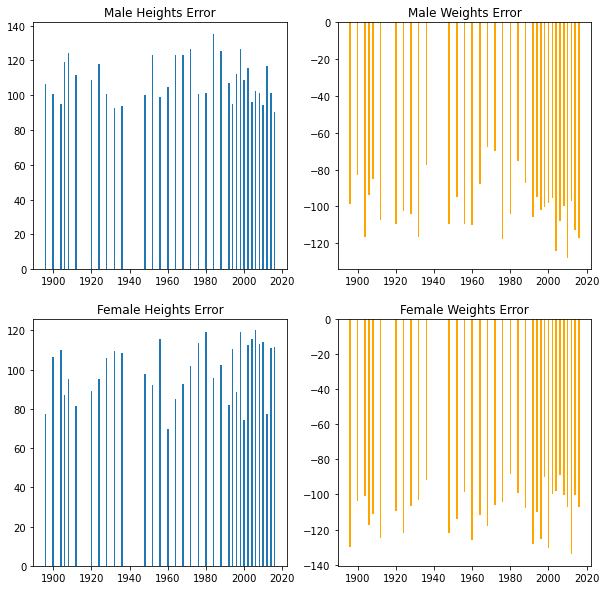

In [66]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.bar(total_years, yearlyOnlineErrorE[:, 0])
plt.title('Male Heights Error')

plt.subplot(2, 2, 2)
plt.bar(total_years, yearlyOnlineErrorE[:, 1], color='orange')
plt.title('Male Weights Error')

plt.subplot(2, 2, 3)
plt.bar(total_years, yearlyOnlineErrorF[:, 0])
plt.title('Female Heights Error')

plt.subplot(2, 2, 4)
plt.bar(total_years, yearlyOnlineErrorF[:, 1], color='orange')
plt.title('Female Weights Error')

plt.show()

#### Final comparison between Actual data, Offline KMeans, and Online KMeans

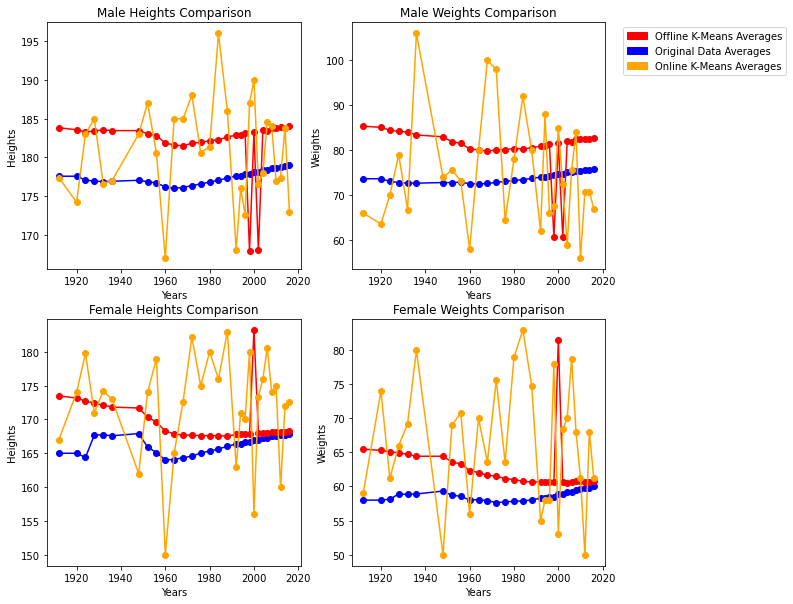

In [67]:
plt.figure(figsize=(10, 10))

blue_patch = mpatches.Patch(color='blue', label='Original Data Averages')
red_patch = mpatches.Patch(color='red', label='Offline K-Means Averages')
orange_patch = mpatches.Patch(color='orange', label='Online K-Means Averages')

plt.subplot(2, 2, 1)
plt.plot(total_years[5:35], f[:, 1], marker='o', color='blue')
plt.plot(total_years[5:35], maleoffline[:, 1][5:35], marker='o', color='red')
plt.plot(total_years[5:35], onlinemale[:,0][5:35], marker='o', color='orange')
plt.title('Male Heights Comparison')
plt.xlabel('Years')
plt.ylabel('Heights')

plt.subplot(2, 2, 2)
plt.plot(total_years[5:35], f[:, 0], marker='o', color='blue')
plt.plot(total_years[5:35], maleoffline[:, 0][5:35], marker='o', color='red')
plt.plot(total_years[5:35], onlinemale[:,1][5:35], marker='o', color='orange')
plt.title('Male Weights Comparison')
plt.xlabel('Years')
plt.ylabel('Weights')

plt.legend(handles=[red_patch, blue_patch, orange_patch], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2, 2, 3)
plt.plot(total_years[5:35], e[:, 1], marker='o', color='blue')
plt.plot(total_years[5:35], femaleoffline[:, 1][5:35], marker='o', color='red')
plt.plot(total_years[5:35], onlinefemale[:,0][5:35], marker='o', color='orange')
plt.title('Female Heights Comparison')
plt.xlabel('Years')
plt.ylabel('Heights')

plt.subplot(2, 2, 4)
plt.plot(total_years[5:35], e[:, 0], marker='o', color='blue')
plt.plot(total_years[5:35], femaleoffline[:, 0][5:35], marker='o', color='red')
plt.plot(total_years[5:35], onlinefemale[:,1][5:35], marker='o', color='orange')
plt.title('Female Weights Comparison')
plt.xlabel('Years')
plt.ylabel('Weights')

plt.show()